In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/cleaned_data.csv', dtype={'article_id': str,'customer_id': str})

In [8]:
articles = pd.read_csv("articles_hm.csv")
df_art = articles.copy()

#전처리
#1. ID 형식 통일
df_art['article_id'] = df_art['article_id'].astype(str).str.zfill(10)

#2. 결측치(NULL) 제어 (detail_desc의 NULL값을 No Description로)
df_art['detail_desc'] = df_art['detail_desc'].fillna('No Description')

#3. 불필요 컬럼 제거 (메모리 줄이기) : Name(이름)이 존재하여 중복 정보인 Code(코드성 숫자) 컬럼 불필요
cols_to_drop = [
    'product_type_no', 
    'graphical_appearance_no', 
    'colour_group_code', 
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_code',
    'index_group_no',
    'section_no',
    'garment_group_no'
]
df_art_cleaned = df_art.drop(columns=cols_to_drop) 

C:\Users\user\AppData\Local\Temp\ipykernel_12632\2120107130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


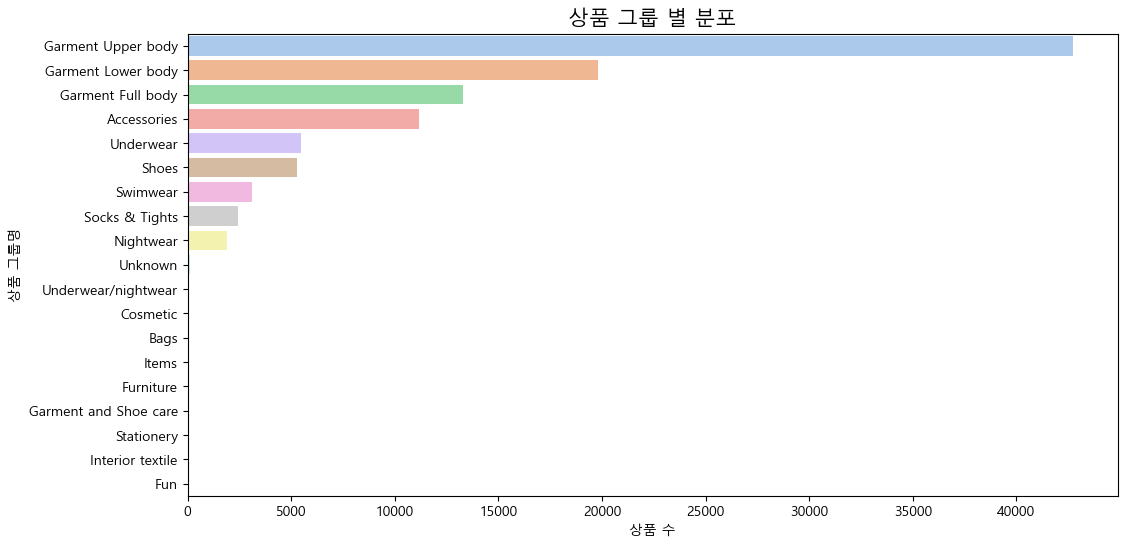

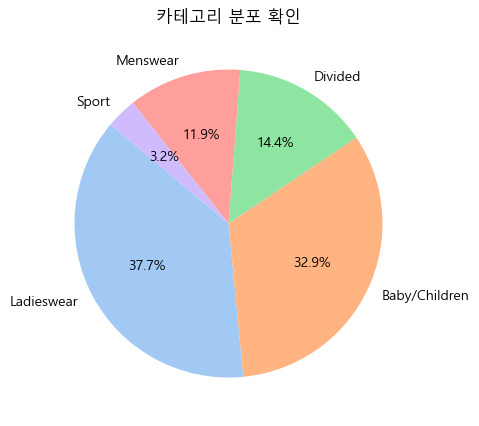

In [9]:
## [articles] EDA 시각화

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. product_group_name(상품 그룹) 분포 확인 (가로형 막대그래프), 내림차순
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_art_cleaned, 
    y='product_group_name', 
    order=df_art_cleaned['product_group_name'].value_counts().index,
    palette='pastel'
)
plt.title('상품 그룹 별 분포', fontsize=15)  
plt.xlabel('상품 수')
plt.ylabel('상품 그룹명')
plt.show()

# 2. 카테고리 분포 확인
plt.figure(figsize=(5, 5))
df_art_cleaned['index_group_name'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel'),
    ylabel=''   #ylabel False로 설정(위치변경)
)
plt.title('카테고리 분포 확인')
plt.show()

##### 여기부터는 조인한 이후(df)로 간단하게 정리한 것

In [34]:
print("전체 카테고리에서 어떤 카테고리가 가장 판매량이 높은가 (top10)")
total_top_products = df['prod_name'].value_counts().head(10)
print(total_top_products)

전체 카테고리에서 어떤 카테고리가 가장 판매량이 높은가 (top10)
prod_name
Jade HW Skinny Denim TRS       5919
Luna skinny RW                 4561
Timeless Midrise Brief         2948
Despacito                      2749
Cat Tee.                       2629
Kanta slacks RW                2574
Simple as That Triangle Top    2499
Skinny Ankle R.W Brooklyn      2437
Tilly (1)                      2249
Shake it in Balconette         2211
Name: count, dtype: int64


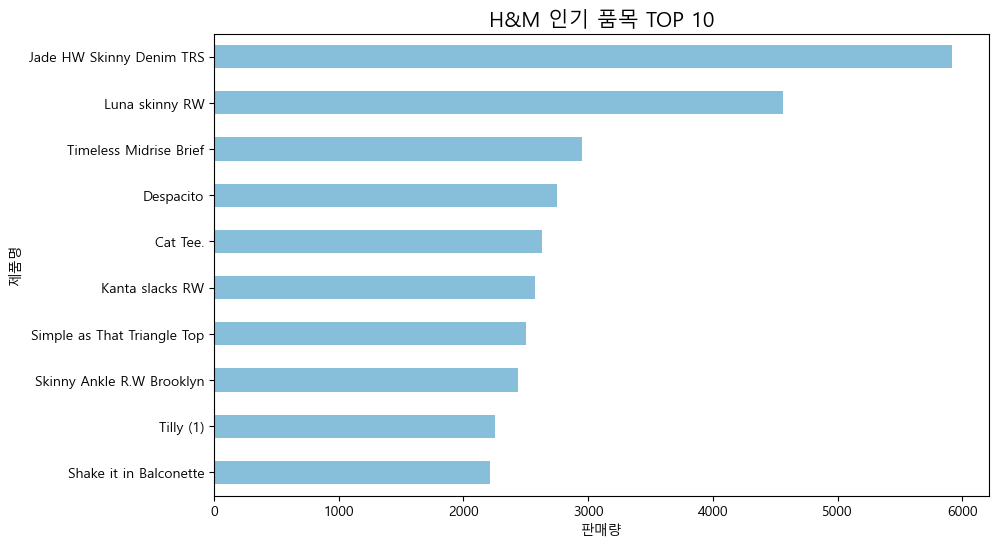

In [ ]:
df['prod_name'].value_counts().head(10).plot(
    kind='barh', #가로로 볼거임
    color=sns.color_palette('RdBu_r')[1],   #그냥 통일합시다 어 어지러워 색 하나만 씁시다;;
    figsize=(10, 6)
).invert_yaxis()    #내림차순

plt.title('H&M 인기 품목 TOP 10', fontsize=15)
plt.xlabel('판매량')
plt.ylabel('제품명')    #삭제해도 무방
plt.show()

### 일반 제품 내 상위 실제 판매량 순위별로
- 1 : 데님 **팬츠**
- 2 : 스키니 **팬츠**
- 3 : 이너웨어 **하의**
- 4 : 데스..파..시..또... (티셔츠/상의 계열)
- 5 : 캐주얼 상의 (고양이 티셔츠)
- 6 : **슬랙스**(포멀한 정장 계열)
- 7 : 이너웨어 상의
- 8 : 스키니 **팬츠**
- 9 : 이너웨어 상의
- 10 : 이너웨어 상의

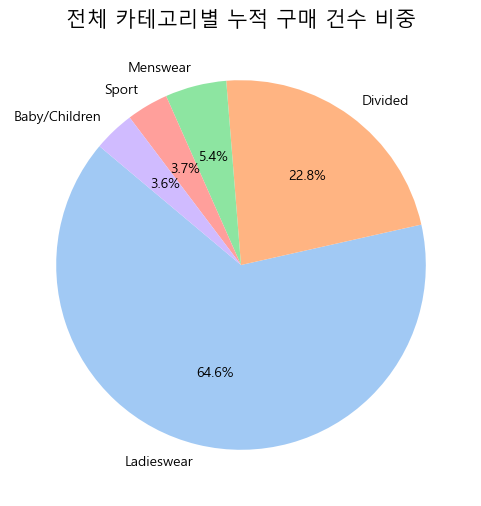

category_main
Ladieswear       672139
Divided          236753
Menswear          55812
Sport             38008
Baby/Children     37389
Name: count, dtype: int64


In [74]:
# 카테고리 거래 건수
category_counts = df['category_main'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%',
    startangle=140, 
    colors=sns.color_palette('pastel'),
)

plt.title('전체 카테고리별 누적 구매 건수 비중', fontsize=15)
plt.show()

#실제 카테고리 별 거래량
print(category_counts)

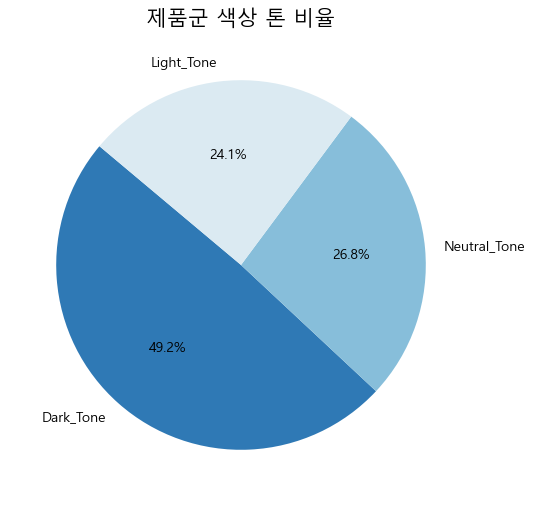

In [215]:
# 제품군 색상 톤 비율
tone_counts = df['color_tone'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    tone_counts, 
    labels=tone_counts.index, 
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('RdBu_r'))
plt.title('제품군 색상 톤 비율', fontsize=15)
plt.show()

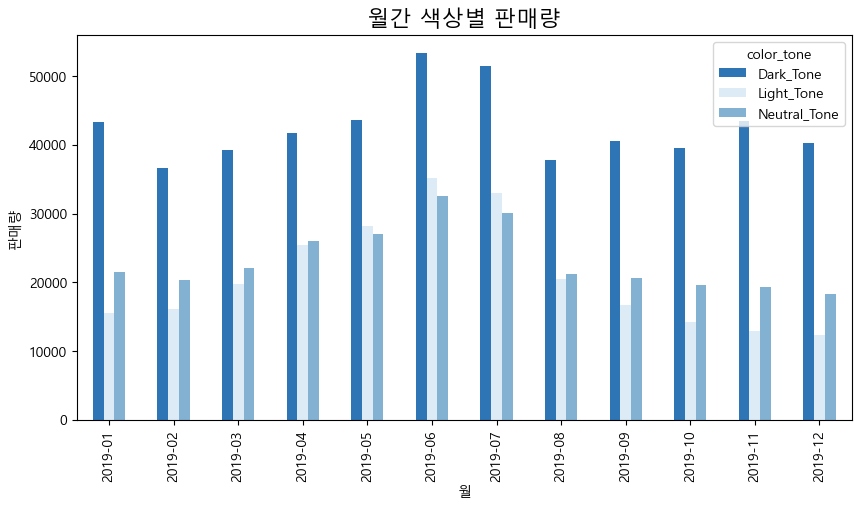

In [14]:
#월간 색상별 판매량
tone_trend = df.groupby(['year_month', 'color_tone']).size().unstack(fill_value=0)  #가로로 펼치고 없으면 0으로 채워~
### 색을 위 파이차트랑 통일하려면
my_tones = ['#2E75B6', '#DDEBF7', '#82B1D1']

tone_trend.plot(
    kind='bar', #area로 두는 게 낫나? 어.... barh? 일단 line은 안되고 그냥 bar로 하고 팀원들과 상의
    # stacked=True,     #이것도 상의 (area, bar로 결정되면) line이면 marker='o'도 붙이쉐이
    # color=sns.color_palette('vlag'),
    color = my_tones,
    figsize=(10, 5)
)

plt.title('월간 색상별 판매량', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('월')
plt.show()

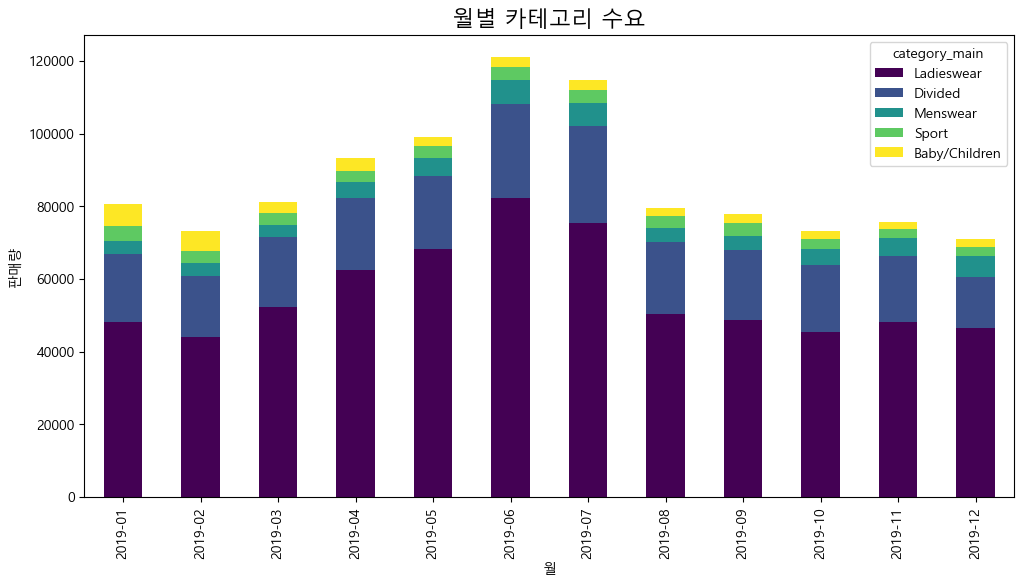

In [ ]:
# #월별 카테고리 수요

category_data = df.groupby(['year_month', 'category_main']).size().unstack(fill_value=0)

# category_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='mako',width=0.8)

## 가독성이 안좋아서 다시 재배치하고 인덱스 부여한 후 정렬
category_sequence = category_data.sum().sort_values(ascending=False).index
category_data[category_sequence].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='viridis')

plt.title('월별 카테고리 수요', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('월')
plt.show()

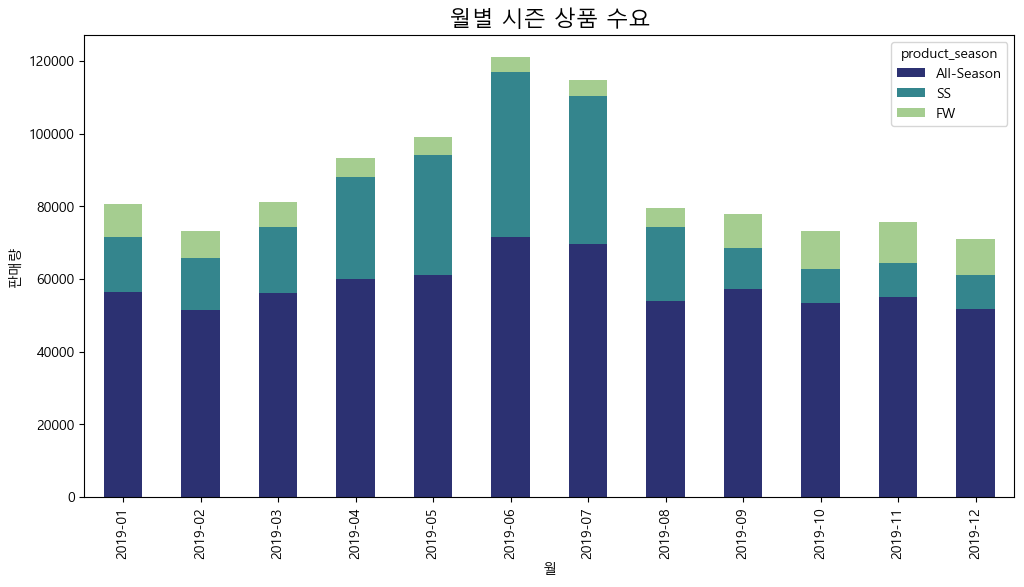

In [247]:
#시즌별 카테고리 수요

season_data = df.groupby(['year_month', 'product_season']).size().unstack(fill_value=0)
#너도 안되겠다
season_sequence = season_data.sum().sort_values(ascending=False).index
season_data[season_sequence].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='crest_r') #로꾸거

plt.title('월별 시즌 상품 수요', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('월')
plt.show()

자 할거 내일
1. 연령대 채널 분석도 가져와서 수정하기 (필요한가? 주제가 흐려질까봐 걱정)
2. 4-2 주석넣기
3. 뭐 .. 뭐하지? 기본 우리 연령대x채널x매출 분석~ 혹은 프로젝트 메인 분석 시각화를 좀 봐야겠다

In [17]:
#!python -m jupyter nbconvert --to markdown "04_code_collection.ipynb"